# データの可視化

## データの可視化

<ul>
<li>使用するグラフの選択。</li>
<li>ヒストグラムの作成。</li>
<li>棒グラフの作成。</li>
<li>散布図の作成。</li>
<li>折れ線グラフの作成。</li>
</ul>

## 使用するグラフの選択

<ul>
<li>1変数のみ</li>
<ul>
<li>要素を数えたい->ヒストグラム</li>
</ul>
<li>2変数</li>
<ul>
<li>種類と数量の関係性を見たい -> 棒グラフ</li>
<li>数量同士の関係性を見たい -> 散布図</li>
<li>数量同士の関係性を見たい -> 散布図</li>
</ul>
</ul>

## ヒストグラムの作成(1)

<ul>
<li>対象が1変数のみで、要素の数え上げを行いたい場合=> ヒストグラム</li>
</ul>

<ul>
<li>数量の場合</li> 
<ul>
<li>適切な区間(レンジ) に区切り、区間毎に要素の数を数え挙げます。</li>
</ul>
</ul>

<ul>
<li>種類の場合</li>
<ul>
<li>種類毎に要素を数え挙げます。</li>
</ul>
 </ul>


## ヒストグラムの作成(2)

<ul>
<li>実際に描いてみよう</li>
</ul>

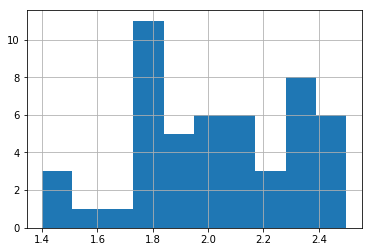

In [12]:
# pandasでIrisデータの読み込み
import pandas as pd
iris_df = pd.read_csv('03_iris.csv')
# グラフでインライン表示命令 & 必要なライブラリの読み込み
%matplotlib inline
import matplotlib.pyplot as plt
#Iris-virginica の PetalWidth をプロットしてみる
virginica_petal_width = iris_df[iris_df.Name == "Iris-virginica"].PetalWidth
virginica_petal_width.hist()

##  ヒストグラムの作成(3)　

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b0fc8e860>,
      dtype=object)

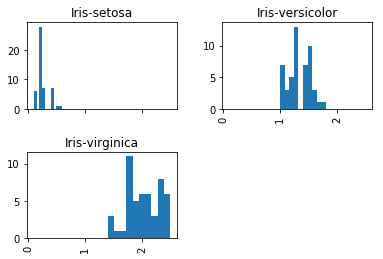

In [13]:
# PetalWidth と Name からなるデータフレームのサブセットを作成
petal_width_df = iris_df[["PetalWidth", "Name"]]
# hist メソッド by 引数を指定するとそれぞれ別エリアにプロットできる
# また sharex 引数で同じレンジの x 軸を使用するかどうか指定できる
petal_width_df.hist(by="Name", sharex=True)

## ヒストグラムの作成(4)

Name
Iris-setosa        AxesSubplot(0.125,0.125;0.775x0.755)
Iris-versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
Iris-virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: PetalWidth, dtype: object

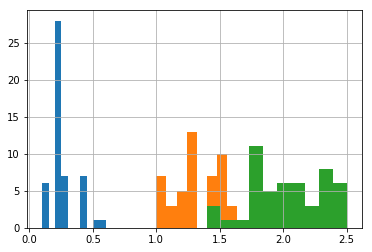

In [14]:
# groupby後に要素を選択した後histメゾットを使用する
petal_width_df.groupby("Name").PetalWidth.hist()

##  棒グラフの作成(1) 

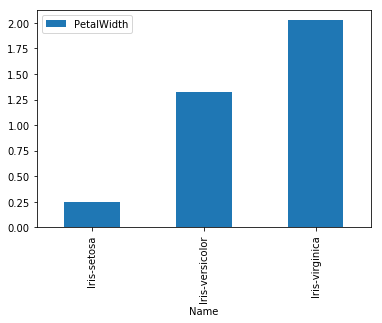

In [15]:
# 品種別PetalWidth　平均値の比較
# kind引数にbarを指定することで棒グラフを描ける
petal_width_df.groupby("Name").mean().plot(kind="bar")

## 棒グラフの作成(2)

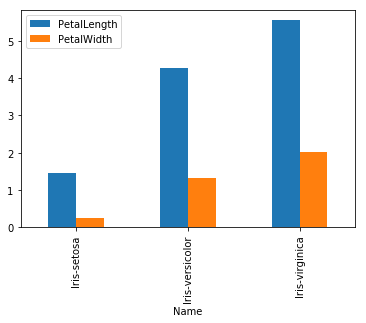

In [16]:
# PetalLength, PetalWidthとNameからなるデータフレーム作成
petal_df = iris_df[["PetalLength", "PetalWidth", "Name"]]

# 品種別 PetalLength, PetalWidth　平均値の比較
petal_df.groupby("Name").mean().plot(kind="bar")

## 散布図の作成(1)

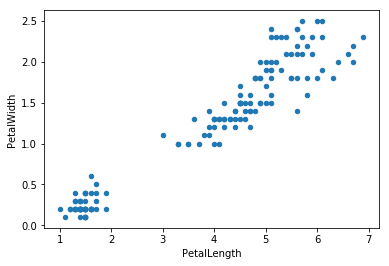

In [17]:
# kind引数にscatterを指定することで散布図を描ける
# x,yそれぞれにx軸要素, y軸要素の名称を指定する
petal_df.plot(kind="scatter", x="PetalLength", y="PetalWidth")

## 散布図の作成(2)

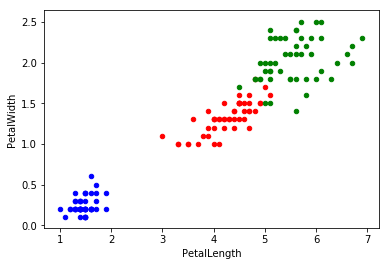

In [18]:
# 3品種別に描いてみる
p_setosa_df = petal_df[petal_df.Name =="Iris-setosa"]
p_versicolor_df = petal_df[petal_df.Name =="Iris-versicolor"]
p_virginica_df = petal_df[petal_df.Name =="Iris-virginica"]
# ax を次の plot 時に渡せば同じグラフに重ねて描ける
A = p_setosa_df.plot(kind="scatter", x="PetalLength", y="PetalWidth", color="blue")
B = p_versicolor_df.plot(kind="scatter", x="PetalLength", y="PetalWidth", color="red", ax=A)
p_virginica_df.plot(kind="scatter", x="PetalLength", y="PetalWidth", color="green", ax=B)

## 折れ線グラフの作成(2)

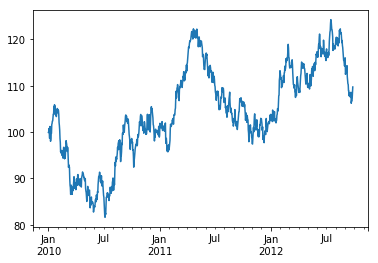

In [19]:
# 数値計算用ライブラリ numpy の読み込み
import numpy as np

# 擬似的な株価データ（＝ランダムウォーク）を生成してみる
# np.random.randn(1000) で平均 0, 標準偏差 1 の乱数1000個を生成
# pd.date_range('2010-01-01', periods=1000) で '2010-01-01' から 1000 日分のラベル生成
#   => 毎日の株価変動
ts_a = 1.0 * pd.Series(np.random.randn(1000), index=pd.date_range("2010-01-01", periods=1000))

# 初期値 を 100 として、ある日までの変化分を cumsum() メソッドで足し上げる（累積和）
stock_a_price = 100 + ts_a.cumsum()

# プロットしてみる
stock_a_price.plot(kind="line")

## 折れ線グラフの作成(3)

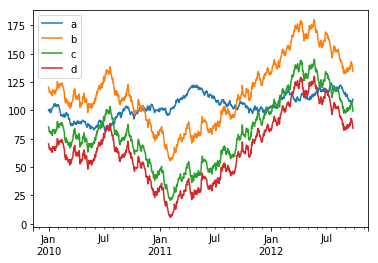

In [20]:
# 変化量と初期値が違うものを幾つか生成してみる
ts_b = 2 * pd.Series(np.random.randn(1000), index=pd.date_range("2010-01-01", periods=1000))
ts_c = 0.5 * pd.Series(np.random.randn(1000), index=pd.date_range("2010-01-01", periods=1000))
ts_d = 0.1 * pd.Series(np.random.randn(1000), index=pd.date_range("2010-01-01", periods=1000))
stock_b_price = 120 + ts_b.cumsum()
stock_c_price = 85 + ts_b.cumsum()
stock_d_price = 70 + ts_b.cumsum()
# DataFrame にする
stock_df = pd.DataFrame(
    {"a": stock_a_price, "b": stock_b_price, "c": stock_c_price, "d": stock_d_price},
    columns=["a", "b", "c", "d"]
)

# プロット
stock_df.plot(kind="line")

## やってみよう

<ul>
<li>1."03_iris.csv" を DataFrame 形式で読み込む。</li>
<li>2."SepalLength", "SepalWidth", "Name" からなるデータフレーム sepal_df を作成する。</li>
<li>3.品種別の "SepalLength", "SepalWidth" 中央値の棒グラフを作成する。</li>
<li>4.品種別に色分けした "SepalLength", "SepalWidth" の散布図を作成する。</li>

</ul>

## 解答例 棒グラフ

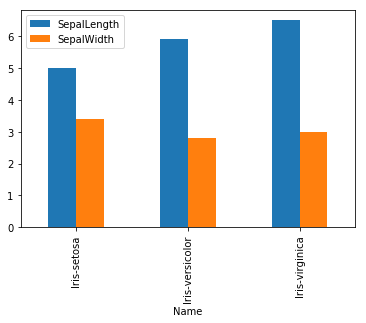

In [21]:
# Irisデータの読み込み
iris_df = pd.read_csv("03_iris.csv")
# "SepalLength","SepalWidth", "Name"からなるフレームsepal_dfの作成
sepal_df = iris_df[["SepalLength", "SepalWidth", "Name"]]
# 品種別"SepalLength", "SepalWidth", 中央値の棒グラフ作成
sepal_df.groupby("Name").median().plot(kind="bar")

## 解答例 散布図

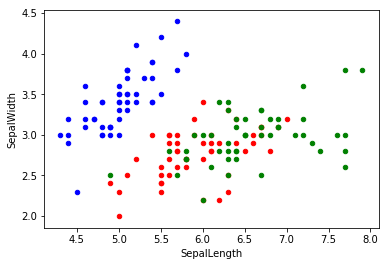

In [22]:
# 品種別に色分けした"SepalLength","SepalWidth"の散布図作成
# 3品種別DataFrame作成
s_setosa_df = sepal_df[sepal_df.Name == "Iris-setosa"]
s_versicolor_df = sepal_df[sepal_df.Name == "Iris-versicolor"]
s_virginica_df = sepal_df[sepal_df.Name == "Iris-virginica"]
# axを次のplot時に渡す
A = s_setosa_df.plot(kind="scatter", x="SepalLength", y="SepalWidth", color="blue")
B = s_versicolor_df.plot(kind="scatter", x="SepalLength", y="SepalWidth", color="red", ax=A)
s_virginica_df.plot(kind="scatter", x="SepalLength", y="SepalWidth", color="green", ax=B)